In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import copy

In [78]:
path = os.getcwd() + '/data_input/2021-3-25/gold/0_gold_test_ppp_1s_bin8/run1'
# path = os.getcwd() + '/data_input/2021-3-25/ni5_mar2/0_ni5_mar_ppp_120s_bin8_d2o/run1'

In [79]:
pd.set_option('display.max_rows',300)
files = sorted([i for i in os.listdir(path) if '.txt' in i and 'ps' not in i and 'powers' not in i])

data = [i for i in files if '_bg' not in i]
bkg = [i for i in files if '_bg' in i]

col_names = ['wl','1','2','cts']
bkg

['2600_bg.txt',
 '2800_bg.txt',
 '3000_bg.txt',
 '3100_bg.txt',
 '3300_bg.txt',
 '3500_bg.txt',
 '3700_bg.txt']

In [80]:
ef=pd.DataFrame()
files = data
for i in files:
    i_name = i.rstrip('.txt')
    df = pd.read_csv(path+'/'+i, sep='\t', names=col_names)
    df.drop(columns=['1','2'], inplace=True)
    df['wn'] = 10000000/df['wl'] - 12579
    df.sort_values(by='wn',inplace=True)
    df.columns = pd.MultiIndex.from_product([[i_name], df.columns])
    df = df.reset_index(drop=True)
    ef = pd.concat([ef,df],axis=1)

ff = ef.loc[:,ef.columns.get_level_values(1)!='wl']

dic_df = {}
col_list = ff.columns.tolist()
# col_list.reverse()
for item in col_list:
    bg = item[0]
    df_name = "df_"+bg.split("_")[0]
    dic_df[df_name] = ff[bg]
keys = list(dic_df.keys())
dic_ddf = copy.deepcopy(dic_df)

count = 0
count_ls = []
target_dict=dic_ddf

if '_bg' in files[0]:
    for index,value in enumerate(keys):
        try:
            first = dic_ddf[keys[index]]
            second = dic_ddf[keys[index+1]]
#             third = dic_ddf[keys[index+2]]
            for i,wn in enumerate(second['wn']):
                if abs(wn-first['wn'][0]) == min(abs(second['wn']-first['wn'][0])):
                    count=count+i
                    count_ls.append(count)
        except IndexError:
            count_ls.append(0)
else:
    for index,value in enumerate(keys):
        try:
            first = dic_ddf[keys[index]]
            second = dic_ddf[keys[index+1]]
            third = dic_ddf[keys[index+2]]
            for i,wn in enumerate(second['wn']):
                if abs(wn-first['wn'][0]) == min(abs(second['wn']-first['wn'][0])) and second['wn'][0]!=first['wn'][0]:
                    count=count+i
                    count_ls.append(count)
                elif second['wn'][0]==first['wn'][0]!=third['wn'][0] and abs(wn-third['wn'][0]) == min(abs(second['wn']-third['wn'][0])):
                    count=count+i
                    count_ls.append(count)
        except IndexError:
            count_ls.append(0)
        
def append_ahead(dataframe, n_rows, flag='ahead'):
    if flag == 'ahead':
        tst_data = {k:np.zeros(n_rows) for k in dataframe.columns}
        test_df = pd.DataFrame(tst_data)
        test_df = test_df.append(dataframe).reset_index(drop=True)
        test_df.replace(0.,np.nan, inplace=True)
        return test_df
    elif flag == 'behind':
        tst_data = {k:np.zeros(n_rows) for k in dataframe.columns}
        test_df = pd.DataFrame(tst_data)
        dataframe = dataframe.append(test_df).reset_index(drop=True)
        dataframe.replace(0.,np.nan, inplace=True)
        return dataframe

print(count_ls)
count_ls_ahead = sorted(count_ls, reverse=True)
print(count_ls_ahead)
count_ls_behind = [np.max(count_ls_ahead)-i for i in count_ls_ahead]

for index,value in enumerate(target_dict.values()):
    target_dict[keys[index]] = append_ahead(value,count_ls_ahead[index], flag='ahead')

for index,value in enumerate(target_dict.values()):
    target_dict[keys[index]] = append_ahead(value,count_ls_behind[index], flag='behind')

for k,v in target_dict.items():
    v.columns = pd.MultiIndex.from_product([[k], v.columns])

pad_df = pd.concat([v for v in target_dict.values()],axis=1)
pad_df

[22, 22, 44, 44, 66, 88, 88, 110, 110, 132, 0, 0]
[132, 110, 110, 88, 88, 66, 44, 44, 22, 22, 0, 0]


df_2600               df_2700               df_2800               \
         cts           wn      cts           wn      cts           wn   
0        NaN          NaN      NaN          NaN      NaN          NaN   
1        NaN          NaN      NaN          NaN      NaN          NaN   
2        NaN          NaN      NaN          NaN      NaN          NaN   
3        NaN          NaN      NaN          NaN      NaN          NaN   
4        NaN          NaN      NaN          NaN      NaN          NaN   
5        NaN          NaN      NaN          NaN      NaN          NaN   
6        NaN          NaN      NaN          NaN      NaN          NaN   
7        NaN          NaN      NaN          NaN      NaN          NaN   
8        NaN          NaN      NaN          NaN      NaN          NaN   
9        NaN          NaN      NaN          NaN      NaN          NaN   
10       NaN          NaN      NaN          NaN      NaN          NaN   
11       NaN          NaN      NaN          NaN      NaN          NaN   
12       NaN          NaN      NaN          NaN      NaN          NaN   
13       NaN          NaN      NaN          NaN      NaN          NaN   
14       NaN          NaN      NaN          NaN      NaN          NaN   
15       NaN          NaN      NaN          NaN      NaN          NaN   
16       NaN          NaN      NaN          NaN      NaN          NaN   
17       NaN          NaN      NaN          NaN      NaN          NaN   
18       NaN          NaN      NaN          NaN      NaN          NaN   
19       NaN          NaN      NaN          NaN      NaN          NaN   
20       NaN          NaN      NaN          NaN      NaN          NaN   
21       NaN          NaN      NaN          NaN      NaN          NaN   
22       NaN          NaN      NaN          NaN      NaN          NaN   
23       NaN          NaN      NaN          NaN      NaN          NaN   
24       NaN          NaN      NaN          NaN      NaN          NaN   
25       NaN          NaN      NaN          NaN      NaN          NaN   
26       NaN          NaN      NaN          NaN      NaN          NaN   
27       NaN          NaN      NaN          NaN      NaN          NaN   
28       NaN          NaN      NaN          NaN      NaN          NaN   
29       NaN          NaN      NaN          NaN      NaN          NaN   
30       NaN          NaN      NaN          NaN      NaN          NaN   
31       NaN          NaN      NaN          NaN      NaN          NaN   
32       NaN          NaN      NaN          NaN      NaN          NaN   
33       NaN          NaN      NaN          NaN      NaN          NaN   
34       NaN          NaN      NaN          NaN      NaN          NaN   
35       NaN          NaN      NaN          NaN      NaN          NaN   
36       NaN          NaN      NaN          NaN      NaN          NaN   
37       NaN          NaN      NaN          NaN      NaN          NaN   
38       NaN          NaN      NaN          NaN      NaN          NaN   
39       NaN          NaN      NaN          NaN      NaN          NaN   
40       NaN          NaN      NaN          NaN      NaN          NaN   
41       NaN          NaN      NaN          NaN      NaN          NaN   
42       NaN          NaN      NaN          NaN      NaN          NaN   
43       NaN          NaN      NaN          NaN      NaN          NaN   
44       NaN          NaN      NaN          NaN      NaN          NaN   
45       NaN          NaN      NaN          NaN      NaN          NaN   
46       NaN          NaN      NaN          NaN      NaN          NaN   
47       NaN          NaN      NaN          NaN      NaN          NaN   
48       NaN          NaN      NaN          NaN      NaN          NaN   
49       NaN          NaN      NaN          NaN      NaN          NaN   
50       NaN          NaN      NaN          NaN      NaN          NaN   
51       NaN          NaN      NaN          NaN      NaN          NaN   
52       NaN          NaN      NaN          NaN      NaN       

In [81]:
def pad_wn(files):
    ef=pd.DataFrame()
    for i in files:
        i_name = i.rstrip('.txt')
        df = pd.read_csv(path+'/'+i, sep='\t', names=col_names)
        df.drop(columns=['1','2'], inplace=True)
        df['wn'] = 10000000/df['wl'] - 12579
        df.sort_values(by='wn',inplace=True)
        df.columns = pd.MultiIndex.from_product([[i_name], df.columns])
        df = df.reset_index(drop=True)
        ef = pd.concat([ef,df],axis=1)
    
    ff = ef.loc[:,ef.columns.get_level_values(1)!='wl']
    
    dic_df = {}
    col_list = ff.columns.tolist()
    # col_list.reverse()
    for item in col_list:
        bg = item[0]
        df_name = "df_"+bg.split("_")[0]
        dic_df[df_name] = ff[bg]
    keys = list(dic_df.keys())
    dic_ddf = copy.deepcopy(dic_df)
    
    count = 0
    count_ls = []
    target_dict=dic_ddf
    
    if '_bg' in files[0]:
        for index,value in enumerate(keys):
            try:
                first = dic_ddf[keys[index]]
                second = dic_ddf[keys[index+1]]
                for i,wn in enumerate(second['wn']):
                    if abs(wn-first['wn'][0]) == min(abs(second['wn']-first['wn'][0])):
                        count=count+i
                        count_ls.append(count)
            except IndexError:
                count_ls.append(0)
    else:
        for index,value in enumerate(keys):
            try:
                first = dic_ddf[keys[index]]
                second = dic_ddf[keys[index+1]]
                third = dic_ddf[keys[index+2]]
                for i,wn in enumerate(second['wn']):
                    if abs(wn-first['wn'][0]) == min(abs(second['wn']-first['wn'][0])) and second['wn'][0]!=first['wn'][0]:
                        count=count+i
                        count_ls.append(count)
                    elif second['wn'][0]==first['wn'][0]!=third['wn'][0] and abs(wn-third['wn'][0]) == min(abs(second['wn']-third['wn'][0])):
                        count=count+i
                        count_ls.append(count)
            except IndexError:
                count_ls.append(0)
            
    def append_ahead(dataframe, n_rows, flag='ahead'):
        if flag == 'ahead':
            tst_data = {k:np.zeros(n_rows) for k in dataframe.columns}
            test_df = pd.DataFrame(tst_data)
            test_df = test_df.append(dataframe).reset_index(drop=True)
            test_df.replace(0.,np.nan, inplace=True)
            return test_df
        elif flag == 'behind':
            tst_data = {k:np.zeros(n_rows) for k in dataframe.columns}
            test_df = pd.DataFrame(tst_data)
            dataframe = dataframe.append(test_df).reset_index(drop=True)
            dataframe.replace(0.,np.nan, inplace=True)
            return dataframe
    
    count_ls_ahead = sorted(count_ls, reverse=True)
    print('Padding ahead:', count_ls_ahead)
    count_ls_behind = [np.max(count_ls_ahead)-i for i in count_ls_ahead]
    print('Padding behind:', count_ls_behind)
    
    for index,value in enumerate(target_dict.values()):
        target_dict[keys[index]] = append_ahead(value,count_ls_ahead[index], flag='ahead')
    
    for index,value in enumerate(target_dict.values()):
        target_dict[keys[index]] = append_ahead(value,count_ls_behind[index], flag='behind')
    
    for k,v in target_dict.items():
        v.columns = pd.MultiIndex.from_product([[k], v.columns])
    
    pad_df = pd.concat([v for v in target_dict.values()],axis=1)
    return pad_df

In [82]:
pad_bkg = pad_wn(bkg)
pad_data = pad_wn(data)
pad_bkg

Padding ahead: [132, 110, 88, 66, 44, 22, 0]
Padding behind: [0, 22, 44, 66, 88, 110, 132]
Padding ahead: [132, 110, 110, 88, 88, 66, 44, 44, 22, 22, 0, 0]
Padding behind: [0, 22, 22, 44, 44, 66, 88, 88, 110, 110, 132, 132]


df_2600              df_2800              df_3000              df_3100  \
        cts           wn     cts           wn     cts           wn     cts   
0       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
1       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
2       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
3       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
4       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
5       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
6       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
7       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
8       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
9       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
10      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
11      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
12      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
13      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
14      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
15      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
16      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
17      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
18      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
19      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
20      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
21      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
22      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
23      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
24      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
25      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
26      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
27      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
28      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
29      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
30      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
31      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
32      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
33      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
34      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
35      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
36      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
37      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
38      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
39      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
40      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
41      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
42      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
43      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
44      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
45      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
46      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
47      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
48      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
49      NaN          NaN  

In [90]:
avg_wn_s = pad_bkg.loc[:,pad_bkg.columns.get_level_values(1)=='wn'].apply(np.nanmean, axis=1)
sum_cts_s = pad_bkg.loc[:,pad_bkg.columns.get_level_values(1)=='cts'].apply(np.nanmean, axis=1)
pad_bkg['avg_wn'] = avg_wn_s
pad_bkg['sum_cts'] = sum_cts_s

avg_wn_s = pad_data.loc[:,pad_data.columns.get_level_values(1)=='wn'].apply(np.nanmean, axis=1)
sum_cts_s = pad_data.loc[:,pad_data.columns.get_level_values(1)=='cts'].apply(np.sum, axis=1)
pad_data['avg_wn'] = avg_wn_s
pad_data['sum_cts'] = sum_cts_s
# pad_data.loc[:,pad_data.columns.get_level_values(1)=='wn']
pad_bkg

df_2600              df_2800              df_3000              df_3100  \
        cts           wn     cts           wn     cts           wn     cts   
0       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
1       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
2       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
3       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
4       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
5       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
6       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
7       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
8       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
9       NaN          NaN     NaN          NaN     NaN          NaN     NaN   
10      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
11      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
12      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
13      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
14      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
15      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
16      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
17      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
18      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
19      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
20      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
21      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
22      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
23      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
24      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
25      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
26      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
27      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
28      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
29      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
30      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
31      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
32      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
33      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
34      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
35      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
36      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
37      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
38      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
39      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
40      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
41      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
42      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
43      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
44      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
45      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
46      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
47      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
48      NaN          NaN     NaN          NaN     NaN          NaN     NaN   
49      NaN          NaN  

(2800, 3800)

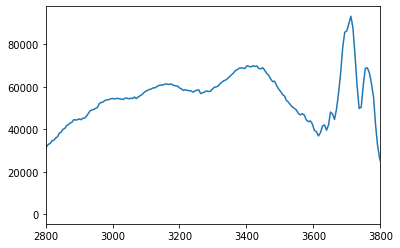

In [91]:
plt.plot(pad_data['avg_wn'],pad_data['sum_cts']-pad_bkg['sum_cts'])
plt.xlim(2800,3800)

In [105]:
10_000_000 / (pad_data.loc[:,pad_data.columns.get_level_values(1)=='wn']['df_2600']+12_579).dropna().apply(np.median)

wn    619.999979
dtype: float64